# Pymaceuticals Inc.
---



 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merged_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
mouse_count = len(merged_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#This finds all rows that are duplicated by Mouse ID and Timepoint
duplicate = merged_df[merged_df.duplicated(subset = ['Mouse ID','Timepoint'], keep = False)]
duplicate

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = merged_df[merged_df['Mouse ID'] == "g989"]
dup_id

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# making a copy of original merged data frame
clean_merge = merged_df.copy()

# removing all rows of data with Mouse ID 'g989'
clean_merge = clean_merge.loc[clean_merge["Mouse ID"] != "g989"]

# verifying 13 rows removed as expected
print(merged_df.shape)
print(clean_merge.shape)
clean_merge.head()

(1893, 8)
(1880, 8)


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_merge["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tv = clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tv = clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tv = clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tv = clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tv = clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

std_stats = pd.DataFrame({"Mean Tumor Volume" : mean_tv, "Median Tumor Volume" : median_tv, "Tumor Volume Variance" : var_tv,
                          "Tumor Volume Std. Dev." : std_tv, "Tumor Volume Std. Err." : sem_tv})
std_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_stats = clean_merge.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# create grouby object for bar plot
bar1 = clean_merge.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
bar1

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

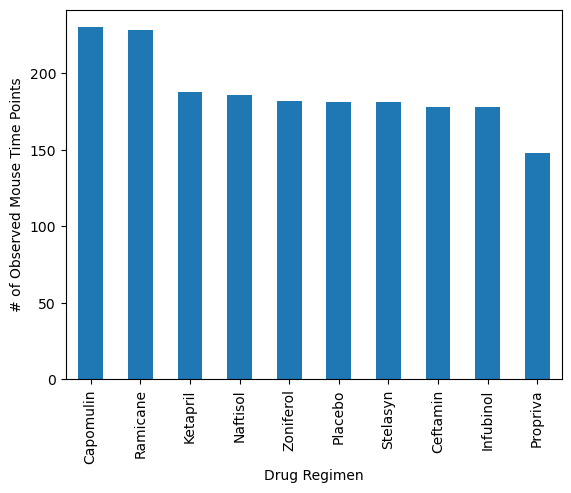

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# bar plot
y1 ='# of Observed Mouse Time Points'
x1 = 'Drug Regimen'
bar_plot_pd = bar1.plot.bar(x='Drug Regimen', y='Timepoint', rot=90, ylabel = y1)

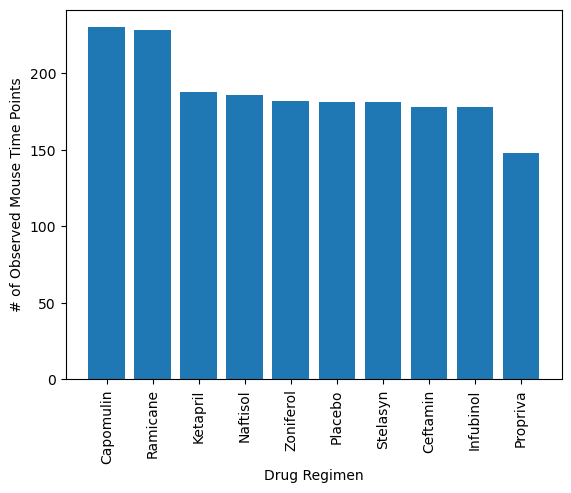

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for
# each drug regimen using pyplot.

plt.xticks(rotation = 90)
plt.bar(bar1.index, bar1.values)
plt.xlabel(x1)
plt.ylabel(y1)
plt.show()


In [13]:
sex_count = clean_merge.groupby(["Mouse ID"])["Sex"].unique().value_counts()
sex_count = sex_count.reset_index()
sex_count['index'] = sex_count['index'].astype(str)
sex_count['index'] = sex_count['index'].str.strip('[]')
sex_count['index'] = sex_count['index'].str.strip("''")
sex_count = sex_count.set_index('index')
sex_count

Sex
index      
Male    125
Female  123

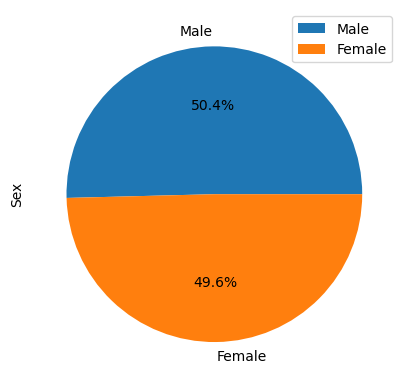

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#sex_count = sex_count.to_frame()
sex_count.plot(kind = 'pie', y = 'Sex', autopct="%1.1f%%")
plt.show()

In [15]:
sex_count.index

Index(['Male', 'Female'], dtype='object', name='index')

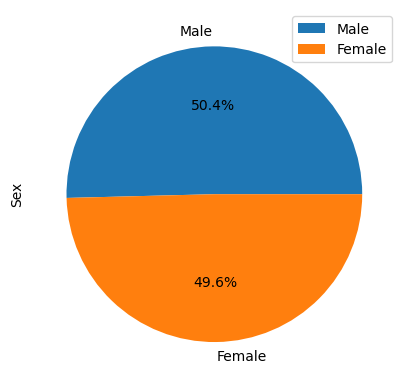

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel("Sex")
plt.pie(sex_count['Sex'], autopct="%1.1f%%", labels = sex_count.index)
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_merge.groupby(['Mouse ID'])['Timepoint'].max()
greatest_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#tumor_merge = clean_merge.merge(greatest_tp, how='left', on = 'Mouse ID').sort_values(by='Mouse ID')

tumor_merge = clean_merge.merge(greatest_tp, how='right', on = ['Mouse ID', 'Timepoint']).sort_values(by='Mouse ID')

# reduces to just the four drug regimens above
CRIC_tumor_sizes = tumor_merge[(tumor_merge["Drug Regimen"] == 'Capomulin') | (tumor_merge["Drug Regimen"] == 'Ramicane') \
                               | (tumor_merge["Drug Regimen"] == 'Infubinol') | (tumor_merge["Drug Regimen"] == 'Ceftamin')]
CRIC_tumor_sizes

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
238     y769         45           68.594745                 4     Ceftamin   
239     y793         45           31.896238                 2    Capomulin   
240     y865         45           64.729837                 3     Ceftamin   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
3    Female          20          28  
6      Male           3          22  
7    Female          10          25  
..      ...         ...         ...  
238  Female           6          27  
239    Male          17          17  
240    Male          23          26  
244    Male          11          16  
245  Female          24          25  

[100 rows x 8 columns]

In [80]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Locate the rows which contain mice on each drug and get the tumor volumes
 
tumor_list_Capomulin = (CRIC_tumor_sizes['Tumor Volume (mm3)'])[CRIC_tumor_sizes["Drug Regimen"] == 'Capomulin']#.tolist()
tumor_list_Ramicane = (CRIC_tumor_sizes['Tumor Volume (mm3)'])[CRIC_tumor_sizes["Drug Regimen"] == 'Ramicane']#.tolist()
tumor_list_Infubinol = (CRIC_tumor_sizes['Tumor Volume (mm3)'])[CRIC_tumor_sizes["Drug Regimen"] == 'Infubinol']#.tolist()
tumor_list_Ceftamin = (CRIC_tumor_sizes['Tumor Volume (mm3)'])[CRIC_tumor_sizes["Drug Regimen"] == 'Ceftamin']#.tolist()

tumor_plot_list = [tumor_list_Capomulin, tumor_list_Ramicane, tumor_list_Infubinol, tumor_list_Ceftamin]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # get quartiles
quartiles_Capomulin = tumor_list_Capomulin.quantile([.25, .5, .75])
quartiles_Ramicane = tumor_list_Ramicane.quantile([.25, .5, .75])
quartiles_Infubinol = tumor_list_Infubinol.quantile([.25, .5, .75])
quartiles_Ceftamin = tumor_list_Ceftamin.quantile([.25, .5, .75])

    # get lower quartiles
lowerq_Capomulin = quartiles_Capomulin[.25]
lowerq_Ramicane = quartiles_Ramicane[.25]
lowerq_Infubinol = quartiles_Infubinol[.25]
lowerq_Ceftamin = quartiles_Ceftamin[.25]

    #get upper quartiles
upperq_Capomulin = quartiles_Capomulin[.75]
upperq_Ramicane = quartiles_Ramicane[.75]
upperq_Infubinol = quartiles_Infubinol[.75]
upperq_Ceftamin = quartiles_Ceftamin[.75]

    # get IRQs (upper quartile - lower quartile)
IRQ_Capomulin = upperq_Capomulin - lowerq_Capomulin
IRQ_Ramicane = upperq_Ramicane - lowerq_Ramicane
IRQ_Infubinol = upperq_Infubinol - lowerq_Infubinol
IRQ_Ceftamin = upperq_Ceftamin - lowerq_Ceftamin

    # get boundaries: lower (lq - 1.5IRQ), upper (uq + 1.5IRQ)
lower_bound_Capomulin = lowerq_Capomulin - (1.5 * IRQ_Capomulin)
lower_bound_Ramicane = lowerq_Ramicane - (1.5 * IRQ_Ramicane)
lower_bound_Infubinol = lowerq_Infubinol - (1.5 * IRQ_Infubinol)    
lower_bound_Ceftamin = lowerq_Ceftamin - (1.5 * IRQ_Ceftamin)

upper_bound_Capomulin = upperq_Capomulin + (1.5 * IRQ_Capomulin)
upper_bound_Ramicane = upperq_Ramicane +(1.5 * IRQ_Ramicane)
upper_bound_Infubinol = upperq_Infubinol + (1.5 * IRQ_Infubinol)    
upper_bound_Ceftamin = upperq_Ceftamin + (1.5 * IRQ_Ceftamin)

 # Determine outliers using upper and lower bounds
outliersCapomulin = tumor_list_Capomulin[((tumor_list_Capomulin > upper_bound_Capomulin)\
                                          | (tumor_list_Capomulin < lower_bound_Capomulin))]
outliersRamicane = tumor_list_Ramicane[((tumor_list_Ramicane > upper_bound_Ramicane)\
                                          | (tumor_list_Ramicane < lower_bound_Ramicane))]
outliersInfubinol = tumor_list_Infubinol[((tumor_list_Infubinol > upper_bound_Infubinol)\
                                          | (tumor_list_Infubinol < lower_bound_Infubinol))]
outliersCeftamin = tumor_list_Ceftamin[((tumor_list_Ceftamin > upper_bound_Ceftamin)\
                                          | (tumor_list_Ceftamin < lower_bound_Ceftamin))]

# shows outliers
print(outliersCapomulin)
print(outliersRamicane)
print(outliersInfubinol)
print(outliersCeftamin)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\kmill\AppData\Local\Temp\ipykernel_1468\1331796554.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(regimen_list)


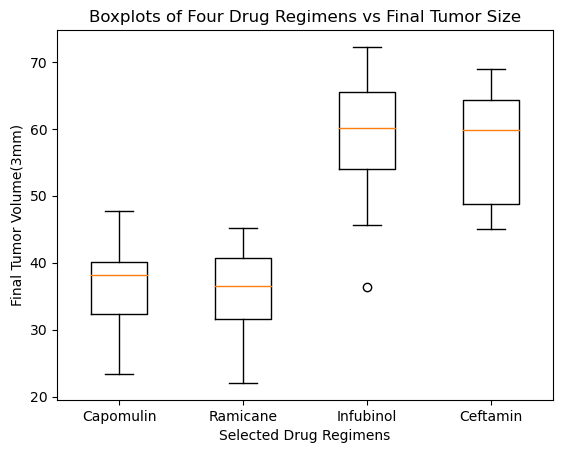

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Boxplots of Four Drug Regimens vs Final Tumor Size")
ax1.set_ylabel('Final Tumor Volume(3mm)')
ax1.set_xlabel('Selected Drug Regimens')
ax1.set_xticklabels(regimen_list)
ax1.boxplot(tumor_plot_list)
plt.show()

## Line and Scatter Plots

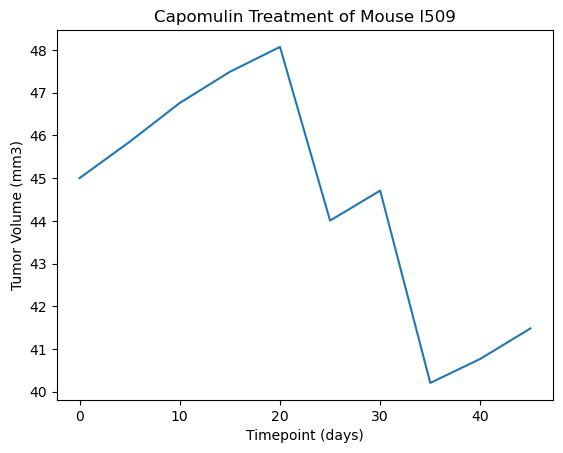

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

    # get data for plot
mouse_l509 = (clean_merge[['Timepoint','Tumor Volume (mm3)']])[clean_merge['Mouse ID'] == 'l509']

    # plot data with appropriate labels
title = 'Capomulin Treatment of Mouse l509'
ylabel = 'Tumor Volume (mm3)'
xlabel = 'Timepoint (days)'
mouse_l509.plot(y = 'Tumor Volume (mm3)', x = 'Timepoint', ylabel = ylabel, xlabel = xlabel, title = title, legend = "")
plt.show()

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

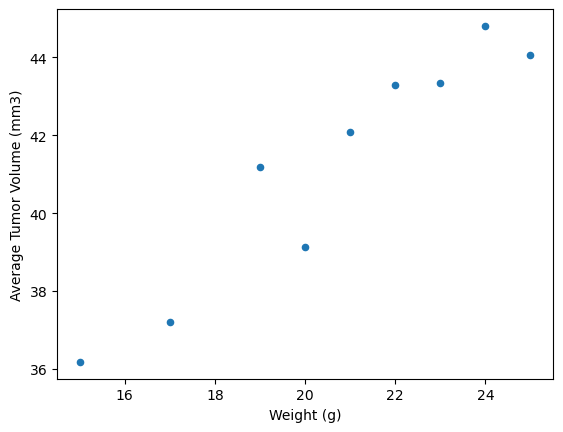

In [138]:
# Generate a scatter plot of mouse weight vs. the observed tumor volume for the entire Capomulin regimen
 #clean_merge.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
    # get data for plot
Cap = (clean_merge[['Tumor Volume (mm3)', 'Weight (g)']])[clean_merge['Drug Regimen'] == 'Capomulin']
plotdata = Cap.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean().to_frame().reset_index()
plotdata.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', ylabel = 'Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95.


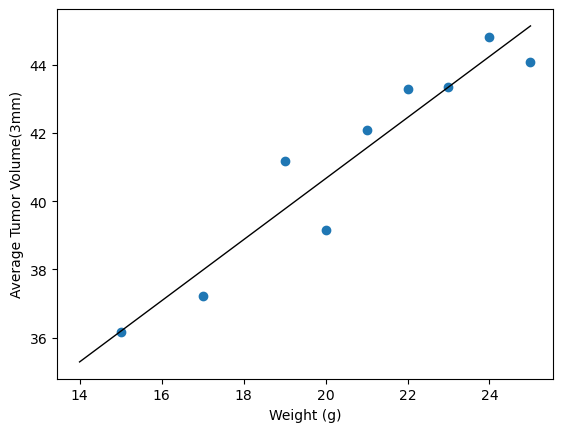

In [179]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


#plotdata.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
fig1, bx = plt.subplots()
x = plotdata['Weight (g)']
y = plotdata['Tumor Volume (mm3)']
bx.set_ylabel('Average Tumor Volume(3mm)')
bx.set_xlabel('Weight (g)')
plt.scatter(x=x, y=y)

# linear regression plot
b, a = np.polyfit(x, y, deg=1)
xseq = np.linspace(x.min()-1, x.max(), num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=1.0)

# corre = plotdata.corr()
# print(corre)

r = st.pearsonr(x, y)
cor = round(r[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {cor}.")